In [53]:
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from axessettings import AxesSetting, linear_sim

In [63]:
# Adjust [Pa]
P_adjust = 0.002e6
# Adjust [mm] 最初に測定
d_adjust = 6.75
# Adjust [mm] dpが小さいときの2回目に測定
d_adjust = 6.32
d_adjust_small = 6.32
TORR_PA = 133.322

In [61]:
data = pd.read_excel("data.xlsx", sheet_name="(1)large", skiprows=[1])
data.drop(index=[0], inplace=True)
data["p"] = (data["p_m"] + data["p_large"] * P_adjust) / TORR_PA
data["d"] = d_adjust - data["d_m"]
data["pd"] = data["p"] * data["d"]

In [56]:
data_small = pd.read_excel("data.xlsx", sheet_name="(1)small", skiprows=[1])
data_small["p"] = (data_small["p_m"] + data_small["p_large"] * P_adjust) / TORR_PA
data_small["d"] = d_adjust_small - data_small["d_m"]
data_small["pd"] = data_small["p"] * data_small["d"]

In [57]:
#PC演習で求めた理論値
data_theory = pd.read_csv("theoretical.csv")

$\alpha/p = A\exp(-Bp/E)$

$\alpha d = \log(1 + 1/\gamma)$

$E=V_S/d,\,\gamma=cst.$

$\frac{\log(1+1/\gamma)}{dp} = A\exp\left(-\frac{Bdp}{V_S}\right)$

$-\frac{Bdp}{V_S} = \log\left(\frac{\log(1+1/\gamma)}{Adp}\right)$

$V_S = \frac{Bdp}{\log(dp) +\log(A) - \log\log(1+1/\gamma)}$

In [58]:
V_S = lambda pd, A_prime, B: B*pd/(np.log(pd*A_prime))
theoreticals = [
    [0.38, 36],
    [0.29, 38],
    [0.38, 64.9],
    [0.43, 36.5],
    [0.48, 57.6]
]

/tmp/ipykernel_5869/3236488315.py:1: RuntimeWarning: divide by zero encountered in divide
  V_S = lambda pd, A_prime, B: B*pd/(np.log(pd*A_prime))


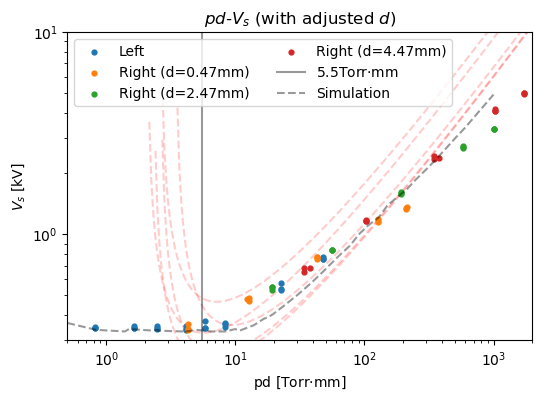

In [86]:
axstg = AxesSetting(title="$pd$-$V_s$ (with adjusted $d$)", xlabel="pd [Torr$\cdot$mm]", ylabel="$V_s$ [kV]", xscale="log", yscale="log", xlim=(5e-1, 2e3), ylim=(0.3, 10))
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# ax.scatter(data["pd"], data["V_s"], c="r", label="measured", s=4)
ax.scatter(data_small["pd"], data_small["V_s"], label="Left", s=12)
for d, data_d in data.groupby("d"):
    ax.scatter(data_d["p"]*(6.32-data_d["d_m"]), data_d["V_s"], label=f"Right (d={d:.2f}mm)", s=12)
    # ax.plot(data_d["p"]*(6.32-data_d["d_m"]), data_d["V_s"], label=f"Right (d={d: .1f}mm)", markersize=4, marker="o")
ax.axvline(5.5, c="black", alpha=0.4, label="5.5Torr$\cdot$mm")
for a, b in theoreticals:
    axstg.plot_func(ax, lambda pd: V_S(pd, a, b)/1e3, xlim=(1/a, 2e3), c="red", linestyle="--", alpha=0.2, zorder=-5)
ax.plot(data_theory["dp"], data_theory["V"], label="Simulation", c="black", linestyle="--", alpha=0.4)
axstg.apply_axes(ax)
ax.legend(ncols=2)
